<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
filename='https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/spam.csv'
df= pd.read_csv(filename,encoding="latin-1")
# other encoding types are ISO-8859-1 and cp1252 and utf-8

In [12]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [0]:
df['label'] = df['class'].map({'ham':0,'spam':1})
X= df['message']
y= df['label']

In [21]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [22]:
total_len = len(df['label'])
percentage_labels = (df['label'].value_counts()/total_len)*100
percentage_labels

0    86.593683
1    13.406317
Name: label, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


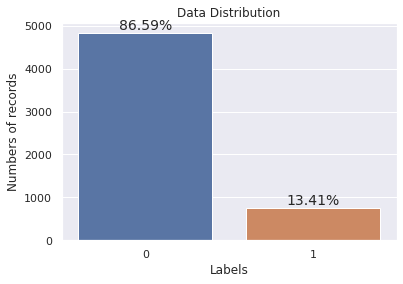

In [23]:
import seaborn as sns
sns.set()
sns.countplot(df.label).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels")
ax.set_ylabel("Numbers of records")
plt.show()


In [0]:
# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3733, 8672)
(1839, 8672)
(3733,)
(1839,)


In [28]:
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

#Alternative Usage of Saved Model
joblib.dump(clf, 'NB_spam_model.pkl')
joblib.dump(cv, 'cv.pkl')

0.9793365959760739


['cv.pkl']

In [31]:
from sklearn import metrics

y_pred_class= clf
print("Accuracy: " + '{:.5f}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))

# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

#Confusion matrix heat plot
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_class), annot=True, ax = ax,fmt=".1f")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Ham_0', 'Spam_1']); ax.yaxis.set_ticklabels(['Ham_0', 'Spam_1'])

# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class]

# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_class]

# calculate AUC

# metrics.roc_auc_score(y_test, y_pred_prob)
print("AUC Score: " + '{:.5f}%'.format(metrics.roc_auc_score(y_test, y_pred_prob)*100))

preds = y_pred_prob_clf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TypeError: ignored

In [0]:
from flask import Flask,render_template,url_for,request
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib

In [0]:
app= Flask(__name__)

@app.route('/')


def home():
  return render_template('home.html')


@app.route('/predict',methods=['POST'])
def predict_fun():
	
    NB_spam_model = open('NB_spam_model.pkl','rb')
    clf = joblib.load(NB_spam_model)
    
    cv_model = open('cv.pkl', 'rb')
    cv = joblib.load(cv_model)
    
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        vect = cv.transform(data).toarray()
        my_prediction = clf.predict(vect)
	
    return render_template('result.html',prediction = my_prediction)
